In [1]:
import pandas as pd
import numpy as np
import statsmodels.stats.proportion as sp
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [5]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Soal Pertama

Tunjukkan statistika deskriptif untuk variabel harga rumah (Column 
Name : `SalePrice`)!

In [6]:
saleprice = df['SalePrice']
saleprice.mean() # mencari nilai mean pada data

180921.19589041095

In [7]:
saleprice.median() # mencari nilai median pada data

163000.0

In [8]:
saleprice.min() # nilai minimal dari kolom sale price

34900

In [9]:
saleprice.max() # nilai maksimal dari kolom sale price

755000

In [10]:
saleprice.mode() # mencari nilai mode atau nilai terbanyak pada data

0    140000
dtype: int64

In [11]:
print('Range:',df['SalePrice'].max()-df['SalePrice'].min()) # perhitungan range

Range: 720100


In [12]:
df['SalePrice'].var()

6311111264.297451

In [13]:
print('Inter Quartile Range (IQR):',df['SalePrice'].quantile(0.75)-df['SalePrice'].quantile(0.25))

Inter Quartile Range (IQR): 84025.0


In [14]:
df['SalePrice'].quantile(0.75)

214000.0

In [15]:
df['SalePrice'].quantile(0.25)

129975.0

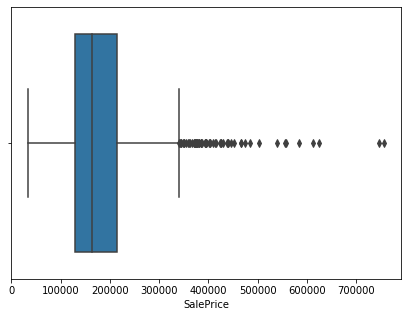

In [19]:
plt.figure(figsize = (7,5))
sns.boxplot(x='SalePrice',data=df)
plt.show()

<b>Inter Quartile Range</b> yang memiliki nilai <b>84025.0</b> digunakan untuk mengetahui persebaran data mulai dari 25% sampai 75%, Artinya dari nilai IQR dapat kita ketahui rentang 50% data harga rumah yang paling umum ditemukan, atau kasus `SalePrice` rumah di Ames, Iowa, Amerika Serikat, rentang harga dimulai dari <b>129.975</b> Dollar AS sampai <b>214.000</b>

<b>nilai mean</b> atau rata-rata dari `SalePrice` adalah <b>180.921,19</b> Dollar AS, jika goalsnya adalah ingin memiliki harga yang lebih bersaing dari kebanyakan properti dengan asumsi fasilitas rumah dan tempat diabaikan, sebaiknya menggunakan harga jual dibawah <b>nilai median</b> yaitu sebesar <b>163.000,00</b> dollar AS. Hal ini dikarenakan grafik persebaran berbentuk <b> Positivly skewed</b> tidak disarankan menggunakan nilai mean karena data <b>not robust</b>.

<b>nilai modus</b> atau mode mewakili harga pasaran rumah yaitu sekitar <b>140.000</b> dollar AS dengan asumsi fasilitas dan tempat diabaikan.

## Soal Kedua

Tunjukkan statistika deskriptif untuk variabel harga rumah (Column Name : SalePrice) setiap tahunnya (Column Name : YrSold)!


In [23]:
# Selisih Harga Rumah
range_data = df['SalePrice'].max()-df['SalePrice'].min()
range_data


720100

In [26]:
# Data Interkualtil
df_interquartile=df['SalePrice'].quantile(0.75)-df['SalePrice'].quantile(0.25)
df_interquartile

84025.0

In [28]:
df_sumary=df.groupby(['YrSold']).agg({'SalePrice':['max','min','count','mean','median','sum','std',pd.Series.mode]})
df_sumary

SalePrice                                                              \
             max    min count           mean  median       sum           std   
YrSold                                                                         
2006      625000  35311   314  182549.458599  163995  57320530  79426.838855   
2007      755000  39300   329  186063.151976  167000  61214777  85768.171410   
2008      446261  40000   304  177360.838816  164000  53917695  69735.610685   
2009      582933  34900   338  179432.103550  162000  60648051  80879.237311   
2010      611657  55000   175  177393.674286  155000  31043893  80451.280085   

                                                  
                                            mode  
YrSold                                            
2006                                      140000  
2007                            [129000, 144000]  
2008                                      140000  
2009                                      110000  
2010    [128000, 140000, 143000, 155000, 190000]

Dari data di atas bisa di tahun 2007 adalah tahun paling baik dan 2010 adalah tahun terburuk.<br>
tidak terlalu significan perbedaan dari tahun 2006 hingga 2009.<br> Terlihat bahwa penjualan dengan nominal value terbesar terjadi di tahun 2007, dengan total di kisaran 61 juta.<br>Harga jual rumah paling tinggi berada di tahun 2007 yaitu senilai 755,000.<br> Sementara itu jumlah unit yang terjual paling tinggi berada di tahun 2009 sebesar 338 unit.<br>Jika melihat data tersebut secara keseluruhan maka trend dari penjualan rumah mengalami penurunan paling signifikan di tahun 2010 dikarenakan jumlah unit yang dijual turun hingga hampir setengah.<br> Dalam hal sebaran kita melihat bahwa sale price di tahun 2008 yang paling merata (karena STD yang paling rendah) dan tahun 2007 yang paling beragam 

## Soal Ketiga

Bagaimana distribusi harga rumah tersebut. Gunakan histogram plot tidak 
terbatas hanya histogram saja. Jelaskan sebaiknya untuk analisa apakah lebih 
baik menggunakan mean atau menggunakan median? Beserta alasannya 
(Column Name : SalePrice)

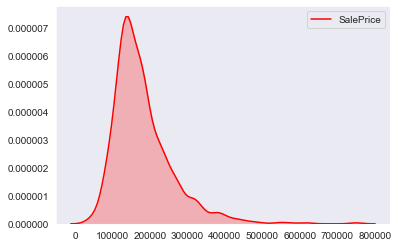

In [29]:
sns.set_style("dark")
sns.kdeplot(df['SalePrice'], shade=True, color="r")
# sns.kdeplot(df['OverallQual'], shade=True, color="b")

Grafik persebaran berbentuk <b> Positivly skewed</b> dengan outlier berada di sebelah kanan dari nilai <b> median </b>

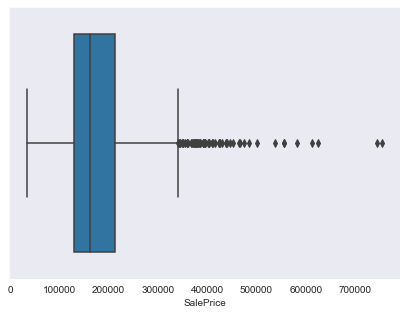

In [30]:
plt.figure(figsize = (7,5))
sns.boxplot(x='SalePrice',data=df)
plt.show()

Dari box plot dapat dilihat banyaknya outliers yang berada pada sebelah kanan dari nilai median

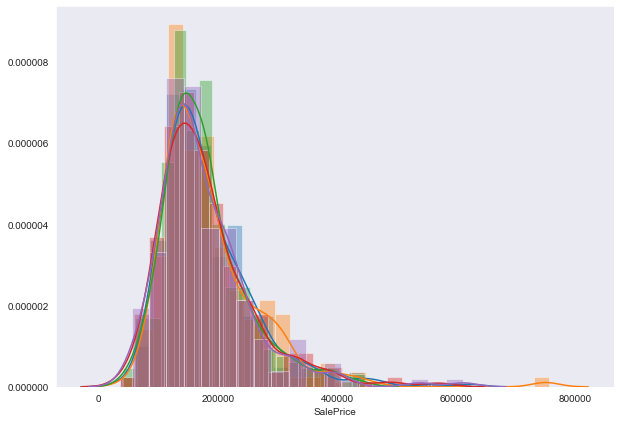

In [48]:
data_2006 = df[df['YrSold'] == 2006]
data_2007 = df[df['YrSold'] == 2007]
data_2008 = df[df['YrSold'] == 2008]
data_2009 = df[df['YrSold'] == 2009]
data_2010 = df[df['YrSold'] == 2010]

plt.figure(figsize = (10,7))
sns.distplot(data_2006['SalePrice'],label='2006')
sns.distplot(data_2007['SalePrice'],label='2007')
sns.distplot(data_2008['SalePrice'],label='2008')
sns.distplot(data_2009['SalePrice'],label='2009')
sns.distplot(data_2010['SalePrice'],label='2010')
plt.show()

Terlihat bahwa secara keseluruhan kebanyakan rumah memiliki harga jual di antara 0 hingga 200,000. Data ini memiliki kecenderungan positively skewed di mana mean>median>mode. Oleh karena itu baiknya menggunakan median untuk pengukuran dikarenakan data ini tidak ini tdk distribusi secara normal (terdapat beberapa outlier). 

## Soal Keempat

Membandingkan 2010 dan 2006

H0 : rata-rata harga 2010 sama dengan atau kurang dari harga di 2006
H1 : rata-rata harga 2010 lebih dari harga di 2006


In [49]:
df_mean=df.groupby(['YrSold']).mean()
df_mean

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
YrSold,,,,,,,,,,,,,,,,,,,,,
2006,740.191083,59.888535,69.305660,10489.458599,6.130573,5.420382,1972.117834,1982.585987,93.869010,444.754777,...,478.487261,98.140127,50.394904,22.726115,2.519108,12.799363,7.697452,16.305732,6.487261,182549.458599
2007,710.753799,54.316109,71.349624,10863.686930,6.133739,5.583587,1972.279635,1986.018237,117.428135,411.656535,...,480.881459,82.814590,48.996960,23.826748,1.580547,15.182371,1.686930,93.708207,6.610942,186063.151976
2008,730.213816,59.029605,69.397638,10587.687500,6.111842,5.759868,1968.907895,1984.796053,107.156146,472.417763,...,464.197368,94.223684,48.641447,21.154605,5.937500,17.108553,3.473684,23.059211,6.546053,177360.838816
2009,750.943787,54.674556,69.296703,10294.248521,6.076923,5.514793,1971.757396,1985.866864,102.445104,443.579882,...,478.798817,97.180473,44.281065,18.529586,4.378698,16.008876,0.000000,20.650888,6.718935,179432.103550
2010,711.245714,56.971429,71.608392,10220.645714,6.000000,5.634286,1970.994286,1984.977143,91.913793,451.891429,...,452.262857,103.108571,36.720000,25.051429,2.182857,13.502857,0.000000,77.451429,4.325714,177393.674286


In [50]:
import scipy.stats as st

In [54]:
df_mean=df[['SalePrice','YrSold']]
saleprice_2006 = df_mean.loc[df_mean['YrSold']==2006]
saleprice_2010 = df_mean.loc[df_mean['YrSold']==2010]

In [55]:
ttest = st.ttest_ind(a = saleprice_2006['SalePrice'], b=saleprice_2010['SalePrice'])
p_value = ttest.pvalue
print('P-Value :',p_value)
if p_value >= 0.05:
    print('Tidak cukup bukti menyatakan bahwa rata-rata harga 2010 lebih dari harga 2006')
else:
    print('Cukup bukti menyatakan (Tolak H0) bahwa rata-rata harga 2010 lebih dari harga 2006')

P-Value : 0.4937082636902659
Tidak cukup bukti menyatakan bahwa rata-rata harga 2010 lebih dari harga 2006


## Soal Advanced

Kasus yang akan digunakan adalah membuka akun deposit untuk nasabah 
bank. Pada kesempatan kali ini data scientist diminta tolong untuk menganalisa 
hasil ab-testing suatu perusahaan bank. Apakah jumlah campaign mampu 
meningkatkan keinginan user untuk membuka akun deposit atau tidak?

In [56]:
df = pd.read_csv('bank-full.csv',sep=';')
df.shape

(45211, 17)

In [57]:

dfb = df.sample(1000).reset_index()
dfb.head()

,index,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42947,35,management,married,tertiary,no,62,no,no,cellular,8,feb,469,2,185,2,failure,yes
1,12861,44,housemaid,married,primary,no,-227,no,yes,cellular,7,jul,153,1,-1,0,unknown,no
2,15433,49,management,divorced,tertiary,no,169,no,no,cellular,18,jul,141,1,-1,0,unknown,no
3,21036,34,management,single,tertiary,no,2205,no,no,cellular,14,aug,635,2,-1,0,unknown,no
4,32325,30,blue-collar,single,secondary,no,445,yes,no,cellular,16,apr,218,1,330,2,failure,no


# Pemahaman konsep A/B Testing

## a. Apa nama experimentnya?

### Uji Keinginan Nasabah dalam membuka atau tidak akun berdasarkan jumlah campaign

## b. Definisikan Hipotesis

Melihat bagaimana nasbah berinteraksi dengan campaign, untuk menguji keinginan nasabah membuka akun<br>
Apakah rata rata campaign-yes > campaign-no

H0 : rata-rata campaign-yes **sama dengan atau kurang dari** campaign-no <br>
H1 : rata-rata campaign-yes **lebih dari** campaign-no

## c. Siapa participant-nya?

Nasabah Bank

In [58]:
dfb.head()

,index,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42947,35,management,married,tertiary,no,62,no,no,cellular,8,feb,469,2,185,2,failure,yes
1,12861,44,housemaid,married,primary,no,-227,no,yes,cellular,7,jul,153,1,-1,0,unknown,no
2,15433,49,management,divorced,tertiary,no,169,no,no,cellular,18,jul,141,1,-1,0,unknown,no
3,21036,34,management,single,tertiary,no,2205,no,no,cellular,14,aug,635,2,-1,0,unknown,no
4,32325,30,blue-collar,single,secondary,no,445,yes,no,cellular,16,apr,218,1,330,2,failure,no


## d. Variabel yang akan diuji apa?

1. y <br>
2. campaign

## e. Metrics apa yang akan digunakan?

Metrik terdistribusi - rata - rata campaign nasabah yang membuka akun dan tidak membuka akun

## f. Berapa sample size dan durasi experiment?

Tingkat kepercayaan - juga disebut tingkat signifikansi adalah probabilitas bahwa hipotesis nol (eksperimen dan kontrol adalah sama).<br>
Durasi - Perbulan
<br>
Sample Size = 1000

## a. Penentuan Hipotesis

H0 : rata-rata campaign-yes **sama dengan atau kurang dari** campaign-no <br>
H1 : rata-rata campaign-yes **lebih dari** campaign-no

In [61]:
yes = df[df['y']== 'yes']
no = df[df['y'] == 'no']

In [62]:
yes['campaign'].mean()

2.1410474569861977

In [63]:
no['campaign'].mean()

2.8463503832473322

## b. Pengujian yang digunakan

## TTEST

In [66]:
ttest = st.ttest_ind(a = yes['campaign'], b=no['campaign'])
p_value = ttest.pvalue
print('P-Value :',p_value)
if p_value >= 0.05:
    print('Tidak cukup bukti menyatakan bahwa rata-rata campaign lebih dari non-campaign')
else:
    print('Cukup bukti menyatakan (Tolak H0) bahwa rata-rata campaign lebih dari gmv non-campaign')

P-Value : 1.0123473642096297e-54
Cukup bukti menyatakan (Tolak H0) bahwa rata-rata campaign lebih dari gmv non-campaign


Dari hasil tersebut dapat disimpulkan bahwa banyaknya campaign tidak menentukan atau menjadi faktor penentu utama seorang nasabah membuka akun di bank, terlihat di p value yang lebih dari 0.05 menandakan hipotesis H0 ditolak dan H1 diterima